Проект 'Titanic', платформа Kaggle
--
**Импорт необходимых инструментов**

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Тренировочный датасет**

In [156]:
df = pd.read_csv('train.csv')

In [157]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Видим, что много данных отсутствует в колонках 'Age', 'Cabin'**

In [159]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Проверим, насколько классы в целевой переменной сбалансированы**

<AxesSubplot:xlabel='Survived', ylabel='count'>

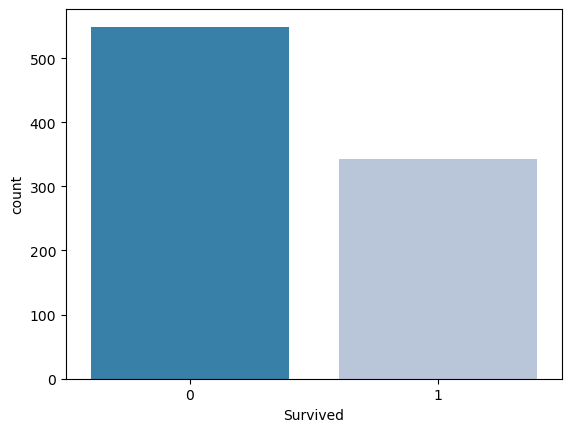

In [160]:
sns.countplot(x = 'Survived', data = df, palette='PuBu_r')

In [161]:
df.drop(['Name', 'Ticket'], axis = 1, inplace=True)

**Удаляю колонки 'Name', 'Ticket', так как полезной информации в них мало**
**Далее я добавляю колонку, в которой будет два значения 'Yes', 'No'. 'Yes' заносим, если данные о возрасте присутствуют, 'No' записываем, если отсутствуют**

In [162]:
def Age_ex(Age):
    if Age == True:
        return 'No'
    else:
        return 'Yes'
df['Age_ex'] = df.isnull()['Age'].apply(Age_ex)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_ex
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,Yes
1,2,1,1,female,38.0,1,0,71.2833,C85,C,Yes
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,Yes
3,4,1,1,female,35.0,1,0,53.1000,C123,S,Yes
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,Yes
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S,Yes
887,888,1,1,female,19.0,0,0,30.0000,B42,S,Yes
888,889,0,3,female,NaN,1,2,23.4500,NaN,S,No
889,890,1,1,male,26.0,0,0,30.0000,C148,C,Yes


**Даллее изучим, являются ли пропуске в стобце 'Age' случайными, или отсутствие данных само по себе о чём-то говорит**
Посмотрим, отличаются ли как-то доли заполненных и пропущенных строк в этой колонке для разных категорий пассажиров 

<Figure size 2000x800 with 0 Axes>

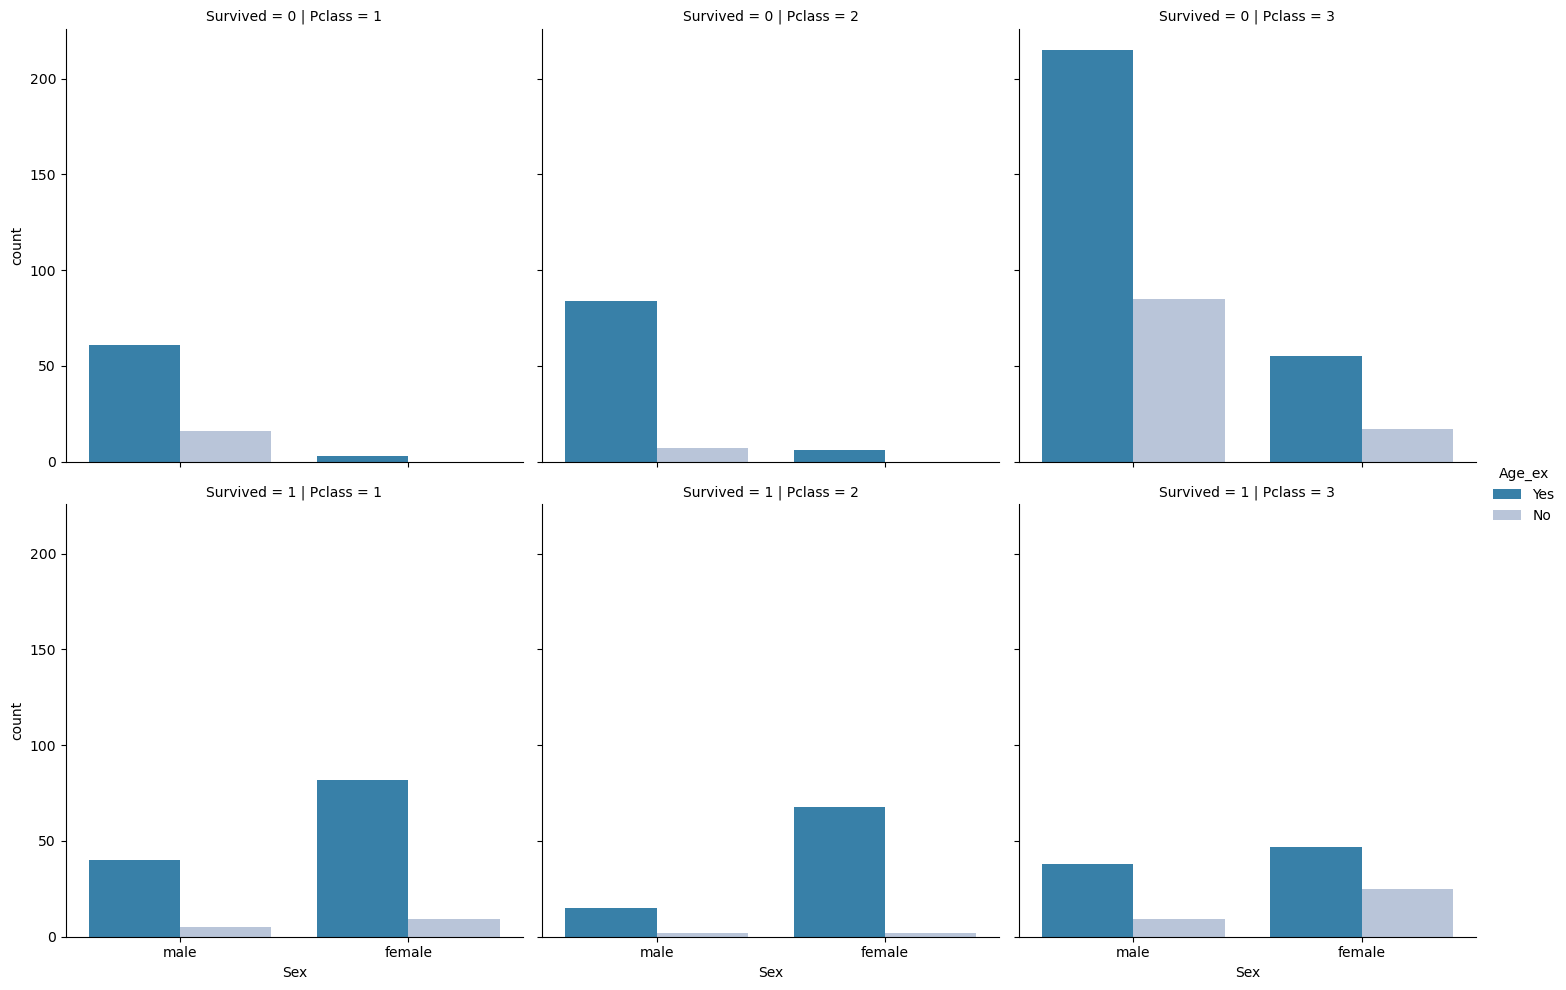

In [163]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Sex',hue='Age_ex',col='Pclass', row = 'Survived',kind='count', palette='PuBu_r')


**Можно сказать, что пропуски являются случайными. Тогда заполним их средними**
Перед этим проверим, отличается ли средний возраст для мужчин, женщин и пассажиров разных классов

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

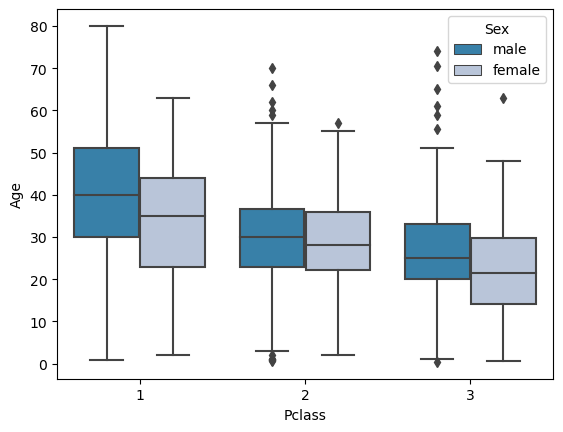

In [164]:
sns.boxplot(x = 'Pclass', y = 'Age', hue = 'Sex', data = df, palette='PuBu_r')

In [165]:
print(' 1st cl, male', np.mean(df[(df['Pclass'] == 1) & (df['Sex'] == 'male') ]['Age']),
     '\n', '1st cl, female', np.mean(df[(df['Pclass'] == 1) & (df['Sex'] == 'female') ]['Age']),
     '\n', '2nd cl, male', np.mean(df[(df['Pclass'] == 2) & (df['Sex'] == 'male') ]['Age']),
     '\n', '2nd cl, female', np.mean(df[(df['Pclass'] == 2) & (df['Sex'] == 'female') ]['Age']),
     '\n', '3rd cl, male', np.mean(df[(df['Pclass'] == 3) & (df['Sex'] == 'male') ]['Age']),
     '\n', '3rd cl, female', np.mean(df[(df['Pclass'] == 3) & (df['Sex'] == 'female') ]['Age']),)

 1st cl, male 41.28138613861386 
 1st cl, female 34.61176470588235 
 2nd cl, male 30.74070707070707 
 2nd cl, female 28.722972972972972 
 3rd cl, male 26.507588932806325 
 3rd cl, female 21.75


**Мы видим существенные различия для разных категорий пассажиров. Для каждой из них было найдено среднее значение, оно же далее и будет внесено в дополнительную колонку 'new_age', которой будет впоследствие заменён признак 'Age', там, где значения отсутствуют, там же, где записи есть, в новую колонку просто заносим значение старой**

In [166]:
def new_age(Age_ex, Pclass, Sex, Age):
    if Age_ex == 'No' and Pclass == 1 and Sex == 'male':
        return 41
    elif Age_ex == 'No' and Pclass == 1 and Sex == 'female':
        return 35
    elif Age_ex == 'No' and Pclass == 2 and Sex == 'male':
        return 31
    elif Age_ex == 'No' and Pclass == 2 and Sex == 'female':
        return 29
    elif Age_ex == 'No' and Pclass == 3 and Sex == 'male':
        return 27
    elif Age_ex == 'No' and Pclass == 3 and Sex == 'female':
        return 22
    elif Age_ex == 'Yes':
        return Age
df['new_age'] = np.vectorize(new_age)(df['Age_ex'], df['Pclass'], df['Sex'], df['Age'])

In [167]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_ex,new_age
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,Yes,22.0
1,2,1,1,female,38.0,1,0,71.2833,C85,C,Yes,38.0
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,Yes,26.0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,Yes,35.0
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,Yes,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S,Yes,27.0
887,888,1,1,female,19.0,0,0,30.0000,B42,S,Yes,19.0
888,889,0,3,female,NaN,1,2,23.4500,NaN,S,No,22.0
889,890,1,1,male,26.0,0,0,30.0000,C148,C,Yes,26.0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
 10  Age_ex       891 non-null    object 
 11  new_age      891 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


**Удаляем колонку 'Age'**

In [169]:
df.drop(['Age', 'Age_ex'], axis = 1, inplace=True)


In [170]:
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,new_age
0,1,0,3,male,1,0,7.2500,NaN,S,22.0
1,2,1,1,female,1,0,71.2833,C85,C,38.0
2,3,1,3,female,0,0,7.9250,NaN,S,26.0
3,4,1,1,female,1,0,53.1000,C123,S,35.0
4,5,0,3,male,0,0,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,NaN,S,27.0
887,888,1,1,female,0,0,30.0000,B42,S,19.0
888,889,0,3,female,1,2,23.4500,NaN,S,22.0
889,890,1,1,male,0,0,30.0000,C148,C,26.0


In [171]:
df.rename(columns = {'new_age': 'Age'}, inplace=True)

In [172]:
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age
0,1,0,3,male,1,0,7.2500,NaN,S,22.0
1,2,1,1,female,1,0,71.2833,C85,C,38.0
2,3,1,3,female,0,0,7.9250,NaN,S,26.0
3,4,1,1,female,1,0,53.1000,C123,S,35.0
4,5,0,3,male,0,0,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,NaN,S,27.0
887,888,1,1,female,0,0,30.0000,B42,S,19.0
888,889,0,3,female,1,2,23.4500,NaN,S,22.0
889,890,1,1,male,0,0,30.0000,C148,C,26.0


**Далее заполним две строки с отсутствующими значениями в поле'Embarked', значением, что встречается наиболее часто**

In [173]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [174]:
df['Embarked'] = df['Embarked'].fillna('S')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     891 non-null    object 
 9   Age          891 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [176]:
df.head(30)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age
0,1,0,3,male,1,0,7.2500,NaN,S,22.0
1,2,1,1,female,1,0,71.2833,C85,C,38.0
2,3,1,3,female,0,0,7.9250,NaN,S,26.0
3,4,1,1,female,1,0,53.1000,C123,S,35.0
4,5,0,3,male,0,0,8.0500,NaN,S,35.0
5,6,0,3,male,0,0,8.4583,NaN,Q,27.0
6,7,0,1,male,0,0,51.8625,E46,S,54.0
7,8,0,3,male,3,1,21.0750,NaN,S,2.0
8,9,1,3,female,0,2,11.1333,NaN,S,27.0
9,10,1,2,female,1,0,30.0708,NaN,C,14.0


In [177]:
df['Cabin'] = df['Cabin'].fillna('Na')

In [178]:
df['Cabin'].unique()

array(['Na', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64'

**При изучении чертежей Титаника в интернете можно выяснить, что его палубам были присвоены буквенные обозначения 'A'-'G'.Предположим, что столбец 'Cabin' состоит из номера палубы и каюты/комнаты, так мы можем узнать, на какой палубе, что может быть полезным, так как корабль тонул долго и пробоина была в одном месте, некоторые пасссажиры могли быть расположены удачнее других. Создадим колонкe: в ней будут храниться данные о палубе для тех, у кого эти данные указаны.**

In [179]:
def deck(Cabin):
    if Cabin != 'Na':
        return Cabin[0]
    else:
        return 'Na'


In [180]:
df['Deck'] = df['Cabin'].apply(deck)

In [181]:
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age,Deck
0,1,0,3,male,1,0,7.2500,Na,S,22.0,Na
1,2,1,1,female,1,0,71.2833,C85,C,38.0,C
2,3,1,3,female,0,0,7.9250,Na,S,26.0,Na
3,4,1,1,female,1,0,53.1000,C123,S,35.0,C
4,5,0,3,male,0,0,8.0500,Na,S,35.0,Na
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,Na,S,27.0,Na
887,888,1,1,female,0,0,30.0000,B42,S,19.0,B
888,889,0,3,female,1,2,23.4500,Na,S,22.0,Na
889,890,1,1,male,0,0,30.0000,C148,C,26.0,C


In [182]:
df.drop(['PassengerId', 'Cabin'], axis = 1, inplace=True)

In [183]:
pd.get_dummies(df,drop_first=True)

,Survived,Pclass,SibSp,Parch,Fare,Age,Sex_male,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Na,Deck_T
0,0,3,1,0,7.2500,22.0,1,0,1,0,0,0,0,0,0,1,0
1,1,1,1,0,71.2833,38.0,0,0,0,0,1,0,0,0,0,0,0
2,1,3,0,0,7.9250,26.0,0,0,1,0,0,0,0,0,0,1,0
3,1,1,1,0,53.1000,35.0,0,0,1,0,1,0,0,0,0,0,0
4,0,3,0,0,8.0500,35.0,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.0,1,0,1,0,0,0,0,0,0,1,0
887,1,1,0,0,30.0000,19.0,0,0,1,1,0,0,0,0,0,0,0
888,0,3,1,2,23.4500,22.0,0,0,1,0,0,0,0,0,0,1,0
889,1,1,0,0,30.0000,26.0,1,0,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

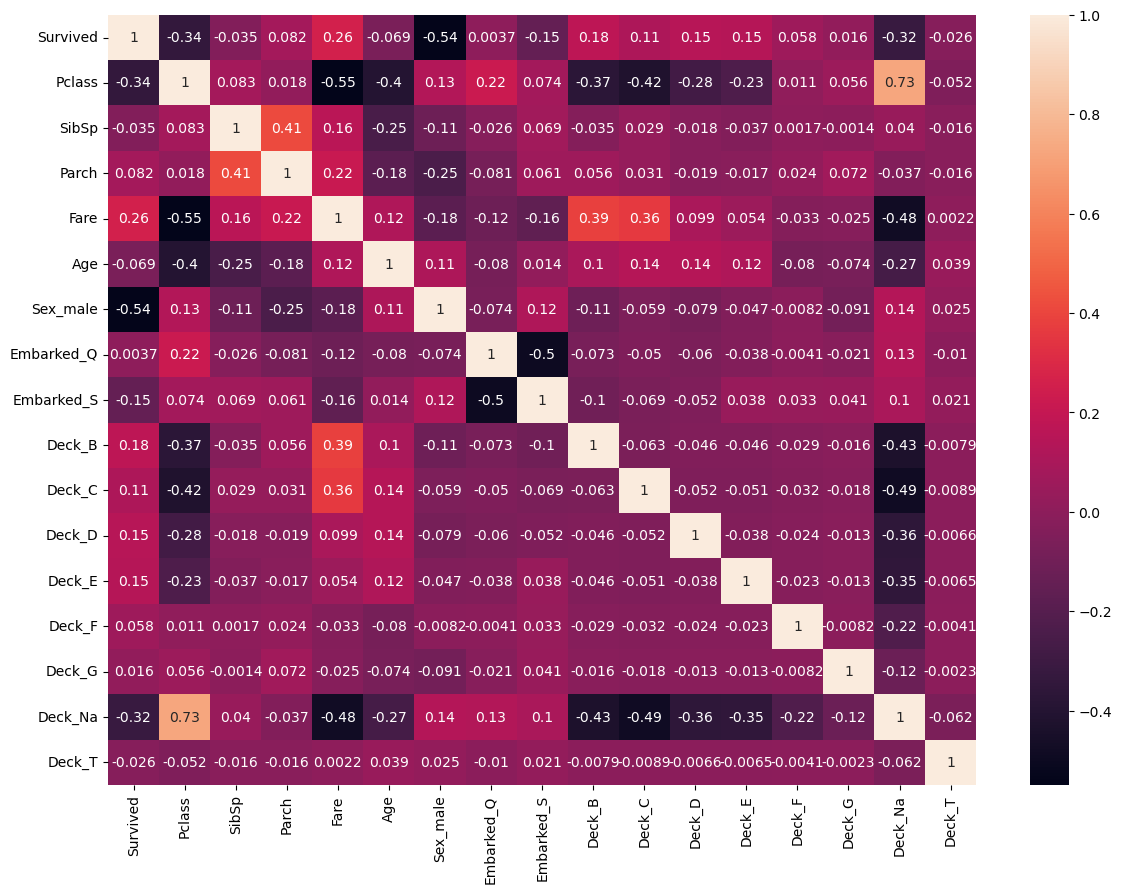

In [187]:
plt.figure(figsize = (14, 10))
sns.heatmap(pd.get_dummies(df,drop_first=True).corr(), annot = True)

**Здесь мы наблюдаем признаки мультиколлинеарности, однако проблемой она может стать лишь для линейной модели, можно попробовать её решить при помощь регуляризации, не будем сразу удалять признаки. Здесь видно, как сильно повлияли на выживаемость пол(видимо, в первую очередь спасали женщин  и детей, многие мужчины не успели), благосостояние(более состоятельные пассажиры имели больше шансов). Мы также видим, что многие из тех, чьи каюты не установлены, не спаслись(похоже, номера кают часто устанавливались по данным выживших)**

In [188]:
df = pd.get_dummies(df,drop_first=True)

**Посмотрим, как много выжило мужчин и женщин**

<AxesSubplot:xlabel='Survived', ylabel='count'>

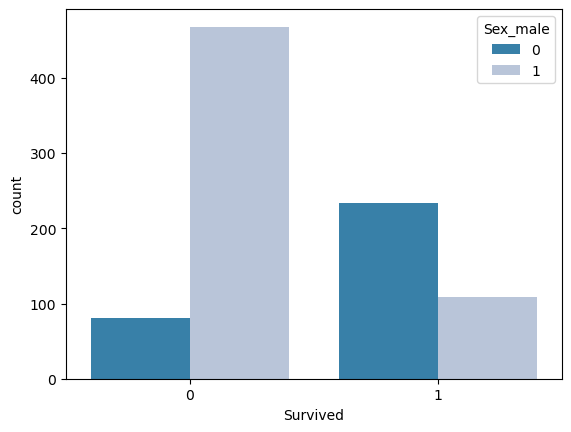

In [194]:
sns.countplot(x = 'Survived', hue = 'Sex_male', data = df, palette='PuBu_r')

**Здесь ясно видно, что шансы выжить у мужчин были меньше, чем у женщин**

**А какие шансы у пассажиров разных классов?**

<AxesSubplot:xlabel='Survived', ylabel='count'>

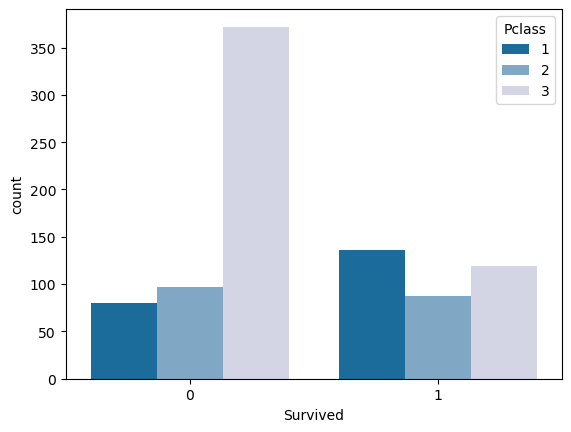

In [220]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df, palette='PuBu_r')

**Видим, что шансы на спасение у пассажиров третьего класса были меньше, чем у остальных**

**Машинное обучение**
--

In [195]:
y = df['Survived']
X = df.drop('Survived', axis = 1)
X

,Pclass,SibSp,Parch,Fare,Age,Sex_male,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Na,Deck_T
0,3,1,0,7.2500,22.0,1,0,1,0,0,0,0,0,0,1,0
1,1,1,0,71.2833,38.0,0,0,0,0,1,0,0,0,0,0,0
2,3,0,0,7.9250,26.0,0,0,1,0,0,0,0,0,0,1,0
3,1,1,0,53.1000,35.0,0,0,1,0,1,0,0,0,0,0,0
4,3,0,0,8.0500,35.0,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,13.0000,27.0,1,0,1,0,0,0,0,0,0,1,0
887,1,0,0,30.0000,19.0,0,0,1,1,0,0,0,0,0,0,0
888,3,1,2,23.4500,22.0,0,0,1,0,0,0,0,0,0,1,0
889,1,0,0,30.0000,26.0,1,0,0,0,1,0,0,0,0,0,0


In [196]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Разделим данные на тестовую и валидационную выборку, а также стандартизируем их для линейной модели**

In [197]:
X_train, X_val, y_train, y_val = train_test_split(
              X, y, test_size=0.10, random_state=101)
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)

**Сами модели**

In [198]:
log_model = LogisticRegression(solver = 'saga', penalty = 'elasticnet', max_iter=10000)
drc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=1000)
svc = SVC()


**Их парамметры для поиска по сетке**

In [204]:
l1_ratio = np.linspace(0, 1, 3)
C = np.logspace(0, 10, 3)
params_log = {'l1_ratio': l1_ratio, 'C': C}
max_depth = np.arange(2, 15)
params_drc = {'max_depth': max_depth}
param_svc = {'C':[0.001, 0.01, 0.1, 0.5, 1],
                'gamma': ['scale', 'auto'], 'degree':[2, 3, 4, 5, 6, 17]}

Линейная модель
--

In [200]:
grid_log = GridSearchCV(log_model, param_grid=params_log, verbose=3)
grid_log.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...............C=1.0, l1_ratio=0.0;, score=0.783 total time=   0.0s
[CV 2/5] END ...............C=1.0, l1_ratio=0.0;, score=0.850 total time=   0.0s
[CV 3/5] END ...............C=1.0, l1_ratio=0.0;, score=0.787 total time=   0.0s
[CV 4/5] END ...............C=1.0, l1_ratio=0.0;, score=0.800 total time=   0.0s
[CV 5/5] END ...............C=1.0, l1_ratio=0.0;, score=0.819 total time=   0.0s
[CV 1/5] END ...............C=1.0, l1_ratio=0.5;, score=0.776 total time=   0.0s
[CV 2/5] END ...............C=1.0, l1_ratio=0.5;, score=0.844 total time=   0.0s
[CV 3/5] END ...............C=1.0, l1_ratio=0.5;, score=0.794 total time=   0.0s
[CV 4/5] END ...............C=1.0, l1_ratio=0.5;, score=0.800 total time=   0.0s
[CV 5/5] END ...............C=1.0, l1_ratio=0.5;, score=0.819 total time=   0.0s
[CV 1/5] END ...............C=1.0, l1_ratio=1.0;, score=0.776 total time=   0.0s
[CV 2/5] END ...............C=1.0, l1_ratio=1.0;,

GridSearchCV(estimator=LogisticRegression(max_iter=10000, penalty='elasticnet',
                                          solver='saga'),
             param_grid={'C': array([1.e+00, 1.e+05, 1.e+10]),
                         'l1_ratio': array([0. , 0.5, 1. ])},
             verbose=3)

Дерево решений
--

In [201]:
grid_drc = GridSearchCV(drc, param_grid=params_drc, verbose=3)
grid_drc.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV 1/5] END .......................max_depth=2;, score=0.770 total time=   0.0s
[CV 2/5] END .......................max_depth=2;, score=0.806 total time=   0.0s
[CV 3/5] END .......................max_depth=2;, score=0.775 total time=   0.0s
[CV 4/5] END .......................max_depth=2;, score=0.762 total time=   0.0s
[CV 5/5] END .......................max_depth=2;, score=0.762 total time=   0.0s
[CV 1/5] END .......................max_depth=3;, score=0.795 total time=   0.0s
[CV 2/5] END .......................max_depth=3;, score=0.856 total time=   0.0s
[CV 3/5] END .......................max_depth=3;, score=0.800 total time=   0.0s
[CV 4/5] END .......................max_depth=3;, score=0.825 total time=   0.0s
[CV 5/5] END .......................max_depth=3;, score=0.812 total time=   0.0s
[CV 1/5] END .......................max_depth=4;, score=0.770 total time=   0.0s
[CV 2/5] END .......................max_depth=4;

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             verbose=3)

Случайный лес
--

In [202]:
grid_rfc = GridSearchCV(rfc, param_grid=params_drc, verbose=3)
grid_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV 1/5] END .......................max_depth=2;, score=0.783 total time=   1.2s
[CV 2/5] END .......................max_depth=2;, score=0.825 total time=   1.1s
[CV 3/5] END .......................max_depth=2;, score=0.756 total time=   1.2s
[CV 4/5] END .......................max_depth=2;, score=0.775 total time=   1.1s
[CV 5/5] END .......................max_depth=2;, score=0.831 total time=   1.1s
[CV 1/5] END .......................max_depth=3;, score=0.789 total time=   1.2s
[CV 2/5] END .......................max_depth=3;, score=0.838 total time=   1.4s
[CV 3/5] END .......................max_depth=3;, score=0.769 total time=   1.2s
[CV 4/5] END .......................max_depth=3;, score=0.781 total time=   1.2s
[CV 5/5] END .......................max_depth=3;, score=0.831 total time=   1.2s
[CV 1/5] END .......................max_depth=4;, score=0.801 total time=   1.2s
[CV 2/5] END .......................max_depth=4;

GridSearchCV(estimator=RandomForestClassifier(n_estimators=1000),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             verbose=3)

**Метод опорных векторов**

In [221]:
grid_svc = GridSearchCV(svc, param_grid=param_svc, verbose=3)
grid_svc.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ....C=0.001, degree=2, gamma=scale;, score=0.379 total time=   0.0s
[CV 2/5] END ....C=0.001, degree=2, gamma=scale;, score=0.625 total time=   0.0s
[CV 3/5] END ....C=0.001, degree=2, gamma=scale;, score=0.625 total time=   0.0s
[CV 4/5] END ....C=0.001, degree=2, gamma=scale;, score=0.381 total time=   0.0s
[CV 5/5] END ....C=0.001, degree=2, gamma=scale;, score=0.381 total time=   0.0s
[CV 1/5] END .....C=0.001, degree=2, gamma=auto;, score=0.379 total time=   0.0s
[CV 2/5] END .....C=0.001, degree=2, gamma=auto;, score=0.625 total time=   0.0s
[CV 3/5] END .....C=0.001, degree=2, gamma=auto;, score=0.625 total time=   0.0s
[CV 4/5] END .....C=0.001, degree=2, gamma=auto;, score=0.381 total time=   0.0s
[CV 5/5] END .....C=0.001, degree=2, gamma=auto;, score=0.381 total time=   0.0s
[CV 1/5] END ....C=0.001, degree=3, gamma=scale;, score=0.379 total time=   0.0s
[CV 2/5] END ....C=0.001, degree=3, gamma=scale

[CV 2/5] END ......C=0.01, degree=6, gamma=auto;, score=0.625 total time=   0.0s
[CV 3/5] END ......C=0.01, degree=6, gamma=auto;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.01, degree=6, gamma=auto;, score=0.619 total time=   0.0s
[CV 5/5] END ......C=0.01, degree=6, gamma=auto;, score=0.619 total time=   0.0s
[CV 1/5] END ....C=0.01, degree=17, gamma=scale;, score=0.379 total time=   0.0s
[CV 2/5] END ....C=0.01, degree=17, gamma=scale;, score=0.644 total time=   0.0s
[CV 3/5] END ....C=0.01, degree=17, gamma=scale;, score=0.650 total time=   0.0s
[CV 4/5] END ....C=0.01, degree=17, gamma=scale;, score=0.637 total time=   0.0s
[CV 5/5] END ....C=0.01, degree=17, gamma=scale;, score=0.619 total time=   0.0s
[CV 1/5] END .....C=0.01, degree=17, gamma=auto;, score=0.379 total time=   0.0s
[CV 2/5] END .....C=0.01, degree=17, gamma=auto;, score=0.625 total time=   0.0s
[CV 3/5] END .....C=0.01, degree=17, gamma=auto;, score=0.625 total time=   0.0s
[CV 4/5] END .....C=0.01, de

[CV 1/5] END ......C=0.5, degree=5, gamma=scale;, score=0.702 total time=   0.0s
[CV 2/5] END ......C=0.5, degree=5, gamma=scale;, score=0.675 total time=   0.0s
[CV 3/5] END ......C=0.5, degree=5, gamma=scale;, score=0.675 total time=   0.0s
[CV 4/5] END ......C=0.5, degree=5, gamma=scale;, score=0.644 total time=   0.0s
[CV 5/5] END ......C=0.5, degree=5, gamma=scale;, score=0.738 total time=   0.0s
[CV 1/5] END .......C=0.5, degree=5, gamma=auto;, score=0.677 total time=   0.0s
[CV 2/5] END .......C=0.5, degree=5, gamma=auto;, score=0.631 total time=   0.0s
[CV 3/5] END .......C=0.5, degree=5, gamma=auto;, score=0.700 total time=   0.0s
[CV 4/5] END .......C=0.5, degree=5, gamma=auto;, score=0.713 total time=   0.0s
[CV 5/5] END .......C=0.5, degree=5, gamma=auto;, score=0.713 total time=   0.0s
[CV 1/5] END ......C=0.5, degree=6, gamma=scale;, score=0.702 total time=   0.0s
[CV 2/5] END ......C=0.5, degree=6, gamma=scale;, score=0.675 total time=   0.0s
[CV 3/5] END ......C=0.5, de

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'degree': [2, 3, 4, 5, 6, 17],
                         'gamma': ['scale', 'auto']},
             verbose=3)

**Изучим показатели каждой модели, полученные на кросс-валидации**

In [206]:
grid_log.best_score_

0.8077795031055899

In [207]:
grid_svc.best_score_

0.7016537267080746

In [208]:
grid_drc.best_score_

0.8190372670807454

In [209]:
grid_rfc.best_score_

0.8277639751552796

In [210]:
grid_knn.best_score_

0.717919254658385

Воспользуемся адаптивным бустингом, в качестве базовой модели возьмём самое успешное дерево, полученное ранее
--

In [211]:
from sklearn.ensemble import AdaBoostClassifier

In [212]:
model = AdaBoostClassifier(base_estimator=grid_drc.best_estimator_)
par_grid = {"n_estimators":[25, 28, 35,40], 'learning_rate': [0.2, 1, 2]}
gr_ada = GridSearchCV(model,par_grid, verbose=3)
gr_ada.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END learning_rate=0.2, n_estimators=25;, score=0.764 total time=   0.0s
[CV 2/5] END learning_rate=0.2, n_estimators=25;, score=0.825 total time=   0.0s
[CV 3/5] END learning_rate=0.2, n_estimators=25;, score=0.800 total time=   0.0s
[CV 4/5] END learning_rate=0.2, n_estimators=25;, score=0.787 total time=   0.0s
[CV 5/5] END learning_rate=0.2, n_estimators=25;, score=0.787 total time=   0.0s
[CV 1/5] END learning_rate=0.2, n_estimators=28;, score=0.795 total time=   0.0s
[CV 2/5] END learning_rate=0.2, n_estimators=28;, score=0.825 total time=   0.0s
[CV 3/5] END learning_rate=0.2, n_estimators=28;, score=0.800 total time=   0.0s
[CV 4/5] END learning_rate=0.2, n_estimators=28;, score=0.781 total time=   0.0s
[CV 5/5] END learning_rate=0.2, n_estimators=28;, score=0.794 total time=   0.0s
[CV 1/5] END learning_rate=0.2, n_estimators=35;, score=0.795 total time=   0.0s
[CV 2/5] END learning_rate=0.2, n_estimators=35;

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4)),
             param_grid={'learning_rate': [0.2, 1, 2],
                         'n_estimators': [25, 28, 35, 40]},
             verbose=3)

In [213]:
gr_ada.best_score_

0.7990062111801242

In [222]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred = gr_ada.predict(X_val)

**Лучше всех себя показал случайный лес, сравним его на тестовой выборке с результатами бустинга**

**Показатели бустинга**

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        51
           1       0.84      0.69      0.76        39

    accuracy                           0.81        90
   macro avg       0.82      0.80      0.80        90
weighted avg       0.82      0.81      0.81        90



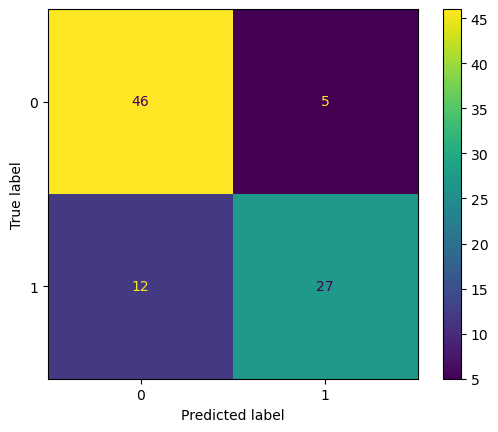

In [223]:
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
print(classification_report(y_val, y_pred))

**показатели случайного леса**

In [224]:
y_pred = grid_rfc.predict(X_val)

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        51
           1       0.93      0.67      0.78        39

    accuracy                           0.83        90
   macro avg       0.86      0.81      0.82        90
weighted avg       0.85      0.83      0.83        90



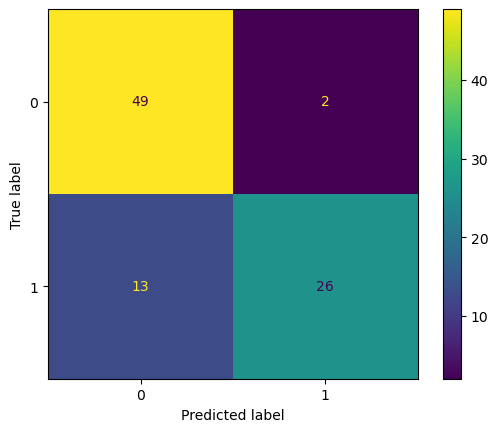

In [225]:
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
print(classification_report(y_val, y_pred))

**Далее применим ту же модель случайного леса на тестовой выборке, перед эти обучим его на всей тренировочной выборке**

In [286]:
df_test = pd.read_csv('test.csv')

In [287]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Для тестовой выборки так же заполниим пустые ячейки**

In [288]:
df_test.drop(['Name', 'Ticket'], axis = 1, inplace=True)
df_test['Age_ex'] = df_test.isnull()['Age'].apply(Age_ex)
df_test['new_age'] = np.vectorize(new_age)(df_test['Age_ex'], df_test['Pclass'], df_test['Sex'], df_test['Age'])
df_test.drop(['Age', 'Age_ex'], axis = 1, inplace=True)
df_test.rename(columns = {'new_age': 'Age'}, inplace=True)
#df_test.drop(['Cabin','Age', 'new_age', 'Age_ex'], axis = 1, inplace=True)
#df_test.rename(columns = {'new_age': 'Age'}, inplace=True)
df_test

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age
0,892,3,male,0,0,7.8292,NaN,Q,34.5
1,893,3,female,1,0,7.0000,NaN,S,47.0
2,894,2,male,0,0,9.6875,NaN,Q,62.0
3,895,3,male,0,0,8.6625,NaN,S,27.0
4,896,3,female,1,1,12.2875,NaN,S,22.0
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,0,0,8.0500,NaN,S,27.0
414,1306,1,female,0,0,108.9000,C105,C,39.0
415,1307,3,male,0,0,7.2500,NaN,S,38.5
416,1308,3,male,0,0,8.0500,NaN,S,27.0


**Значение в колонке 'Fare' заполним средним для этого класса**

In [289]:
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age
152,1044,3,male,0,0,NaN,NaN,S,60.5


In [290]:
np.mean(df_test[df_test['Pclass'] == 3]['Fare'])

12.459677880184334

In [291]:
df_test['Fare'] = df_test['Fare'].fillna(12.46)

**Вновь выведем, на каких палубах жили пассажиры**

In [292]:
df_test['Cabin'] = df_test['Cabin'].fillna('Na')
df_test['Deck'] = df_test['Cabin'].apply(deck)
df_test.drop('Cabin', axis = 1, inplace=True)

In [293]:

X = df_test
X = pd.get_dummies(X,drop_first=True)
X

,PassengerId,Pclass,SibSp,Parch,Fare,Age,Sex_male,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Na
0,892,3,0,0,7.8292,34.5,1,1,0,0,0,0,0,0,0,1
1,893,3,1,0,7.0000,47.0,0,0,1,0,0,0,0,0,0,1
2,894,2,0,0,9.6875,62.0,1,1,0,0,0,0,0,0,0,1
3,895,3,0,0,8.6625,27.0,1,0,1,0,0,0,0,0,0,1
4,896,3,1,1,12.2875,22.0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,8.0500,27.0,1,0,1,0,0,0,0,0,0,1
414,1306,1,0,0,108.9000,39.0,0,0,0,0,1,0,0,0,0,0
415,1307,3,0,0,7.2500,38.5,1,0,1,0,0,0,0,0,0,1
416,1308,3,0,0,8.0500,27.0,1,0,1,0,0,0,0,0,0,1


**Колонки Deck_T нет в тестовом наборе, видимо, значение Т было занесено по ошибке, чтобы модель сработала, добавим такую колонку и заполним ее нулями**

In [294]:
X['Deck_T'] = np.zeros(418)

In [295]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Embarked     418 non-null    object 
 7   Age          418 non-null    float64
 8   Deck         418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [296]:
y_pred_final = grid_rfc.predict(X.drop('PassengerId', axis = 1))

In [297]:
y_pred_final

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [298]:
len(y_pred_final)

418

In [299]:
submission = pd.DataFrame({'PassengerId': X['PassengerId'], 'Survived':y_pred_final})

In [300]:
submission.Survived = submission.Survived.astype(int)

In [301]:
submission.to_csv('Kag_titanic.csv', index = False)

**78 процентов верных предсказаний и топ 16 процентов на Kaggle! Вполне неплохо, но есть, к чему стремиться**